The Original Datasethere

https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras

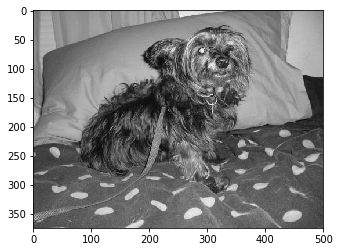

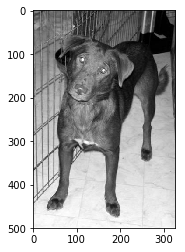

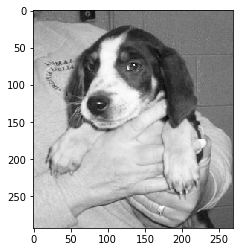

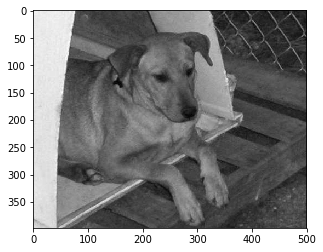

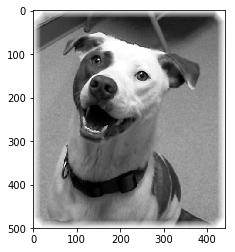

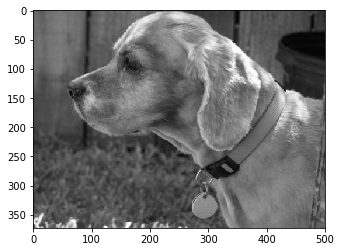

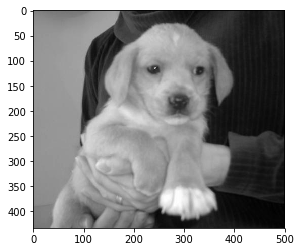

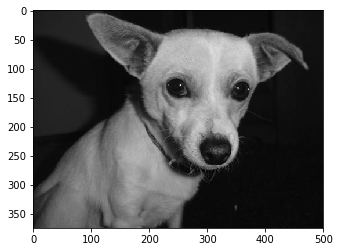

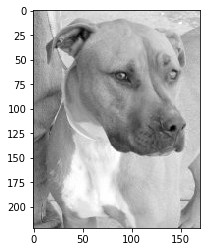

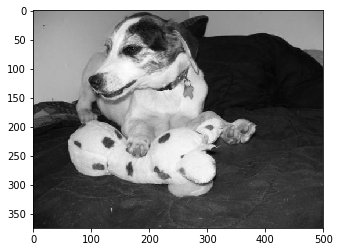

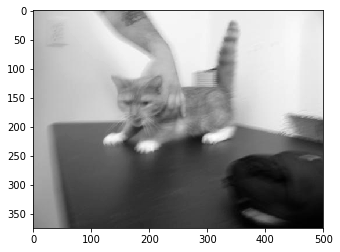

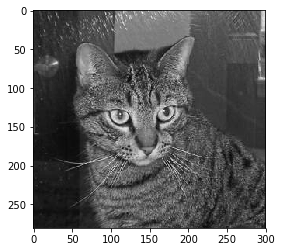

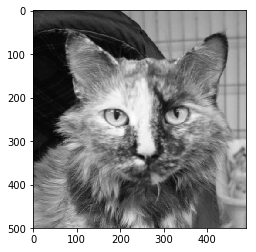

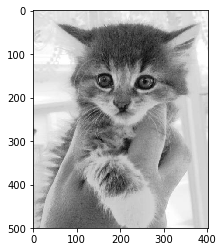

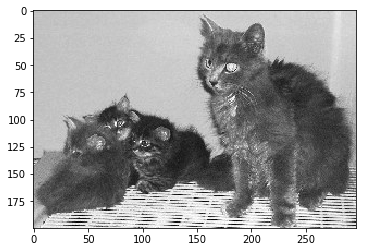

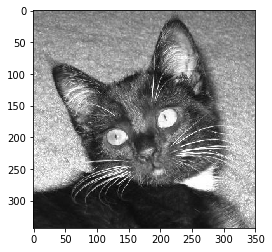

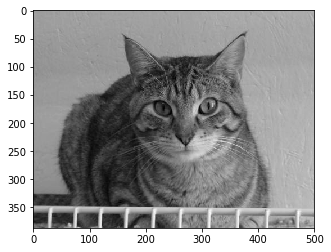

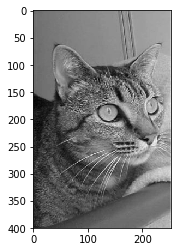

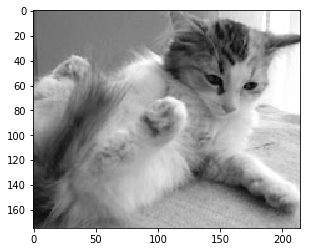

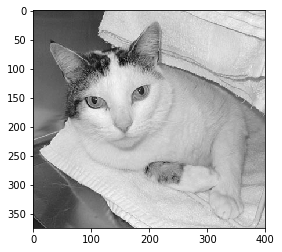

In [3]:
DATADIR = 'PetImages'
CATEGORIES = ["Dog", "Cat"]
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    x=0
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        x+=1
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        if x==10 : 
            break        

In [4]:
print(img_array)
print(img_array.shape)

[[ 58  59  59 ... 193 192 192]
 [ 59  59  60 ... 190 191 192]
 [ 59  60  61 ... 188 187 187]
 ...
 [ 37  37  37 ... 174 173 169]
 [ 37  37  36 ... 176 179 180]
 [ 36  36  36 ... 168 171 172]]
(375, 400)


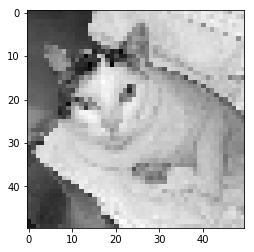

In [5]:
#IMG_SIZE = 5
#IMG_SIZE = 10
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
           

create_training_data()

print(len(training_data))

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:01<00:00, 302.60it/s]


999


In [7]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

1
0
1
1
1
0
1
1
0
0


In [8]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE)

[[[[ 88]
   [ 97]
   [ 99]
   ...
   [ 22]
   [ 24]
   [ 47]]

  [[ 94]
   [101]
   [107]
   ...
   [ 23]
   [ 25]
   [ 47]]

  [[ 99]
   [105]
   [110]
   ...
   [ 24]
   [ 24]
   [ 44]]

  ...

  [[ 90]
   [100]
   [103]
   ...
   [ 88]
   [ 87]
   [ 70]]

  [[ 84]
   [ 92]
   [ 97]
   ...
   [ 83]
   [ 75]
   [ 74]]

  [[100]
   [ 98]
   [100]
   ...
   [ 88]
   [ 70]
   [ 71]]]]


In [9]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()
 
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(IMG_SIZE,IMG_SIZE)),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
model.fit(X, y, epochs=3)

Epoch 1/3
999/999 [==============================] - ETA: 1:07 - loss: 0.8947 - acc: 0.375 - ETA: 21s - loss: 0.7740 - acc: 0.427 - ETA: 12s - loss: 0.7410 - acc: 0.46 - ETA: 8s - loss: 0.7283 - acc: 0.4688 - ETA: 6s - loss: 0.7203 - acc: 0.468 - ETA: 5s - loss: 0.7182 - acc: 0.462 - ETA: 4s - loss: 0.7135 - acc: 0.479 - ETA: 3s - loss: 0.7123 - acc: 0.478 - ETA: 2s - loss: 0.7100 - acc: 0.481 - ETA: 2s - loss: 0.7074 - acc: 0.492 - ETA: 1s - loss: 0.7070 - acc: 0.488 - ETA: 1s - loss: 0.7065 - acc: 0.476 - ETA: 1s - loss: 0.7054 - acc: 0.482 - ETA: 0s - loss: 0.7061 - acc: 0.480 - ETA: 0s - loss: 0.7049 - acc: 0.485 - ETA: 0s - loss: 0.7049 - acc: 0.483 - ETA: 0s - loss: 0.7043 - acc: 0.482 - 3s 3ms/sample - loss: 0.7044 - acc: 0.4825
Epoch 2/3
999/999 [==============================] - ETA: 0s - loss: 0.6778 - acc: 0.593 - ETA: 0s - loss: 0.6947 - acc: 0.531 - ETA: 0s - loss: 0.7034 - acc: 0.493 - ETA: 0s - loss: 0.7009 - acc: 0.486 - ETA: 0s - loss: 0.7013 - acc: 0.476 - ETA: 0s - l

In [15]:
test_loss, test_acc = model.evaluate(X,y)
test_acc

999/999 [==============================] - ETA: 0s - loss: 0.6912 - acc: 0.562 - ETA: 0s - loss: 0.6920 - acc: 0.539 - ETA: 0s - loss: 0.6922 - acc: 0.531 - ETA: 0s - loss: 0.6929 - acc: 0.512 - ETA: 0s - loss: 0.6929 - acc: 0.510 - ETA: 0s - loss: 0.6932 - acc: 0.500 - 0s 291us/sample - loss: 0.6932 - acc: 0.5005


0.5005005